In [9]:
import pandas as pd
data = pd.read_csv('../data/damage.csv')

In [10]:
data

,atkmatk,skill,ele_atk,enemy_def,cdmg,df,atkUp,hits,damage
0,100000.0,200.0,0.0,50000.0,105.0,20.0,0.0,1.0,405000.0


In [13]:
import matplotlib.pyplot as plt

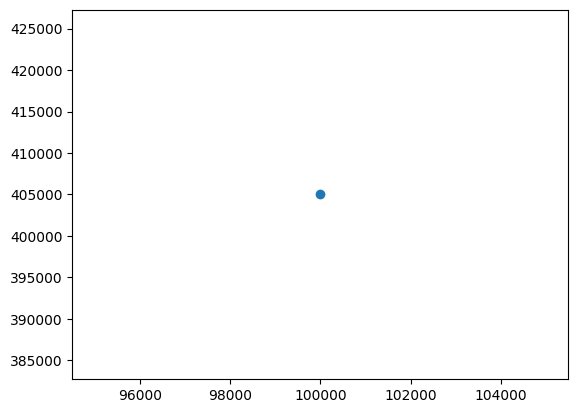

In [16]:
plt.scatter(data.atkmatk, data.damage)

In [18]:
data.corr()

,atkmatk,skill,ele_atk,enemy_def,cdmg,df,atkUp,hits,damage
atkmatk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ele_atk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enemy_def,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cdmg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
atkUp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
damage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
new_data = data.copy()
default_cdmg = 1.2
default_ele = 1
for param in ['atkmatk', 'enemy_def']:
    for i in range(1, 5):
        new_value = data[param] + i * 10000
        parameters = data.copy()
        parameters[param] = new_value

        parameters['damage'] = (
            ((parameters['atkmatk'] * (1 + parameters['atkUp']/100)) * (parameters['skill']/100)) 
            * (default_ele + (parameters['ele_atk']*0.005)) - parameters['enemy_def']
            ) * (default_cdmg + (parameters['cdmg']/100)) * (1 + (parameters['df']/100))
        new_data = pd.concat([new_data, parameters])
        
    for i in range(1, 5):
        new_value = data[param] - i * 10000
        parameters = data.copy()
        parameters[param] = new_value

        parameters['damage'] = (
            ((parameters['atkmatk'] * (1 + parameters['atkUp']/100)) * (parameters['skill']/100)) 
            * (default_ele + (parameters['ele_atk']*0.005)) - parameters['enemy_def']
            ) * (default_cdmg + (parameters['cdmg']/100)) * (1 + (parameters['df']/100))
        new_data = pd.concat([new_data, parameters])

for param in ['atkUp', 'skill', 'cdmg', 'ele_atk', 'df']:
    for i in range(1, 5):
        new_value = data[param] + i * 10
        parameters = data.copy()
        parameters[param] = new_value

        parameters['damage'] = (
            ((parameters['atkmatk'] * (1 + parameters['atkUp']/100)) * (parameters['skill']/100)) 
            * (default_ele + (parameters['ele_atk']*0.005)) - parameters['enemy_def']
            ) * (default_cdmg + (parameters['cdmg']/100)) * (1 + (parameters['df']/100))
        new_data = pd.concat([new_data, parameters])
        
    for i in range(1, 5):
        new_value = data[param] - i * 10
        parameters = data.copy()
        parameters[param] = new_value

        parameters['damage'] = (
            ((parameters['atkmatk'] * (1 + parameters['atkUp']/100)) * (parameters['skill']/100)) 
            * (default_ele + (parameters['ele_atk']*0.005)) - parameters['enemy_def']
            ) * (default_cdmg + (parameters['cdmg']/100)) * (1 + (parameters['df']/100))
        new_data = pd.concat([new_data, parameters])
        
for param in ['hits']:
    for i in range(1, 5):
        new_value = data[param] + i
        parameters = data.copy()
        parameters[param] = new_value

        parameters['damage'] = (
            ((parameters['atkmatk'] * (1 + parameters['atkUp']/100)) * (parameters['skill']/100)) 
            * (default_ele + (parameters['ele_atk']*0.005)) - parameters['enemy_def']
            ) * (default_cdmg + (parameters['cdmg']/100)) * (1 + (parameters['df']/100)) * parameters['hits']
        new_data = pd.concat([new_data, parameters])


new_data.reset_index(drop='index')

,atkmatk,skill,ele_atk,enemy_def,cdmg,df,atkUp,hits,damage
0,100000.0,200.0,0.0,50000.0,105.0,20.0,0.0,1.0,405000.0
1,110000.0,200.0,0.0,50000.0,105.0,20.0,0.0,1.0,459000.0
2,120000.0,200.0,0.0,50000.0,105.0,20.0,0.0,1.0,513000.0
3,130000.0,200.0,0.0,50000.0,105.0,20.0,0.0,1.0,567000.0
4,140000.0,200.0,0.0,50000.0,105.0,20.0,0.0,1.0,621000.0
...,...,...,...,...,...,...,...,...,...
56,100000.0,200.0,0.0,50000.0,105.0,-20.0,0.0,1.0,270000.0
57,100000.0,200.0,0.0,50000.0,105.0,20.0,0.0,2.0,810000.0
58,100000.0,200.0,0.0,50000.0,105.0,20.0,0.0,3.0,1215000.0
59,100000.0,200.0,0.0,50000.0,105.0,20.0,0.0,4.0,1620000.0


In [58]:
new_data.corr()

,atkmatk,skill,ele_atk,enemy_def,cdmg,df,atkUp,hits,damage
atkmatk,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.183063
skill,0.000000,1.000000e+00,0.000000e+00,1.648602e-17,0.000000e+00,0.000000e+00,-1.051815e-33,0.000000e+00,0.091532
ele_atk,0.000000,0.000000e+00,1.000000e+00,1.067243e-17,2.084459e-17,-1.314768e-34,4.041296e-35,-2.161935e-18,0.091532
enemy_def,0.000000,1.648602e-17,1.067243e-17,1.000000e+00,1.295596e-17,9.073790e-18,2.267366e-17,-1.705265e-16,-0.091532
cdmg,0.000000,0.000000e+00,2.084459e-17,1.295596e-17,1.000000e+00,1.772225e-17,1.349821e-32,-3.330597e-16,0.061021
df,0.000000,0.000000e+00,-1.314768e-34,9.073790e-18,1.772225e-17,1.000000e+00,-7.888609e-34,0.000000e+00,0.114415
atkUp,0.000000,-1.051815e-33,4.041296e-35,2.267366e-17,1.349821e-32,-7.888609e-34,1.000000e+00,-4.412113e-18,0.183063
hits,0.000000,0.000000e+00,-2.161935e-18,-1.705265e-16,-3.330597e-16,0.000000e+00,-4.412113e-18,1.000000e+00,0.943942
damage,0.183063,9.153173e-02,9.153173e-02,-9.153173e-02,6.102115e-02,1.144147e-01,1.830635e-01,9.439423e-01,1.000000


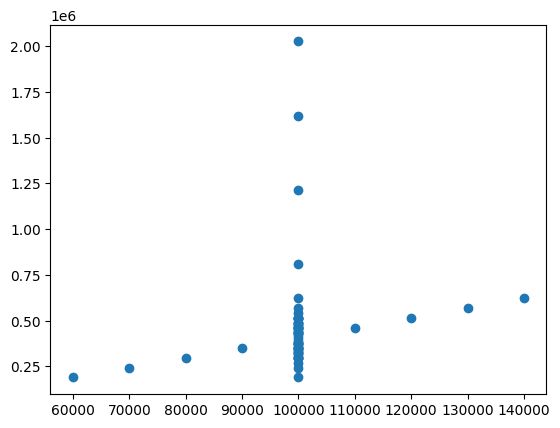

In [59]:
plt.scatter(new_data.atkmatk, new_data.damage)

In [60]:
from sklearn.ensemble import RandomForestRegressor

X = new_data.drop("damage", axis=1)
y = new_data["damage"]

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = model.feature_importances_
print(feature_importances)

[0.05028564 0.01178412 0.01438292 0.01533947 0.01013402 0.02042746
 0.053759   0.82388738]


In [61]:
for feature, importance in zip(model.feature_names_in_, model.feature_importances_):
    print(feature, ': ', importance)

atkmatk :  0.05028563786653178
skill :  0.011784115327009646
ele_atk :  0.014382919353432052
enemy_def :  0.015339469148582639
cdmg :  0.01013402174773
df :  0.020427456621724484
atkUp :  0.05375900123887368
hits :  0.8238873786961158


In [70]:
new_data2 = data.copy()
import random
for i in range(0, 1000):
    parameters = data.copy()
    parameters['atkmatk'] += random.randint(-50000, 50000)
    parameters['enemy_def'] += random.randint(-50000, 50000)
    parameters['hits'] += random.randint(0, 5)
    parameters['cdmg'] += random.randint(-100, 100)
    parameters['skill'] += random.randint(-100, 300)
    parameters['df'] += random.randint(-70, 50)
    parameters['atkUp'] += random.randint(0, 50)
    parameters['damage'] = (
            ((parameters['atkmatk'] * (1 + parameters['atkUp']/100)) * (parameters['skill']/100)) 
            * (default_ele + (parameters['ele_atk']*0.005)) - parameters['enemy_def']
            ) * (default_cdmg + (parameters['cdmg']/100)) * (1 + (parameters['df']/100)) * parameters['hits']
    new_data2 = pd.concat([new_data2, parameters])
    
new_data2.reset_index(drop='index').head()

,atkmatk,skill,ele_atk,enemy_def,cdmg,df,atkUp,hits,damage
0,100000.0,200.0,0.0,50000.0,105.0,20.0,0.0,1.0,4.050000e+05
1,113945.0,255.0,0.0,22285.0,24.0,-21.0,26.0,1.0,3.911300e+05
2,97443.0,497.0,0.0,44049.0,35.0,-12.0,0.0,6.0,3.602946e+06
3,95407.0,482.0,0.0,72274.0,82.0,-46.0,45.0,6.0,3.891051e+06
4,117389.0,216.0,0.0,28052.0,51.0,-40.0,45.0,6.0,2.090641e+06


In [71]:
new_data2.corr()

,atkmatk,skill,ele_atk,enemy_def,cdmg,df,atkUp,hits,damage
atkmatk,1.000000,0.029131,NaN,0.028590,-0.022372,-0.008575,-0.024190,-0.033634,0.305312
skill,0.029131,1.000000,NaN,-0.053286,0.075284,0.002820,-0.002299,-0.063886,0.443431
ele_atk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enemy_def,0.028590,-0.053286,NaN,1.000000,-0.011790,0.041947,0.005368,0.034812,-0.092945
cdmg,-0.022372,0.075284,NaN,-0.011790,1.000000,-0.007850,0.025756,0.007486,0.307736
df,-0.008575,0.002820,NaN,0.041947,-0.007850,1.000000,0.042661,0.005141,0.324816
atkUp,-0.024190,-0.002299,NaN,0.005368,0.025756,0.042661,1.000000,0.060425,0.161609
hits,-0.033634,-0.063886,NaN,0.034812,0.007486,0.005141,0.060425,1.000000,0.476295
damage,0.305312,0.443431,NaN,-0.092945,0.307736,0.324816,0.161609,0.476295,1.000000


In [72]:
from sklearn.ensemble import RandomForestRegressor

X = new_data.drop("damage", axis=1)
y = new_data["damage"]

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = model.feature_importances_
print(feature_importances)

[0.04892372 0.01313417 0.0131062  0.01291936 0.00869833 0.01827585
 0.05116518 0.83377719]


In [73]:
for feature, importance in zip(model.feature_names_in_, model.feature_importances_):
    print(feature, ': ', importance)

atkmatk :  0.04892372331125049
skill :  0.013134169528076813
ele_atk :  0.013106201159488158
enemy_def :  0.012919361591150463
cdmg :  0.008698328093061918
df :  0.018275846841968618
atkUp :  0.051165183187636
hits :  0.8337771862873675
